<a href="https://colab.research.google.com/github/abdullah1234-bit/ML-/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("/content/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


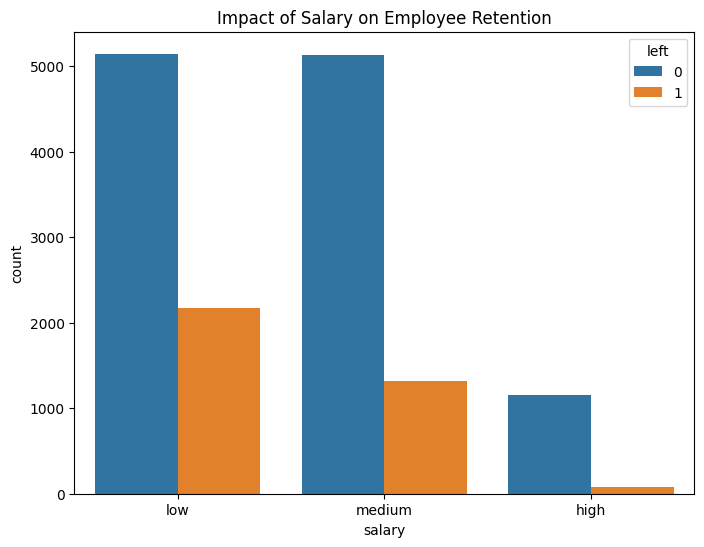

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot bar chart showing impact of employee salary on retention
plt.figure(figsize=(8,6))
sns.countplot(x='salary', hue='left', data=df)
plt.title('Impact of Salary on Employee Retention')
plt.show()

In [10]:
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


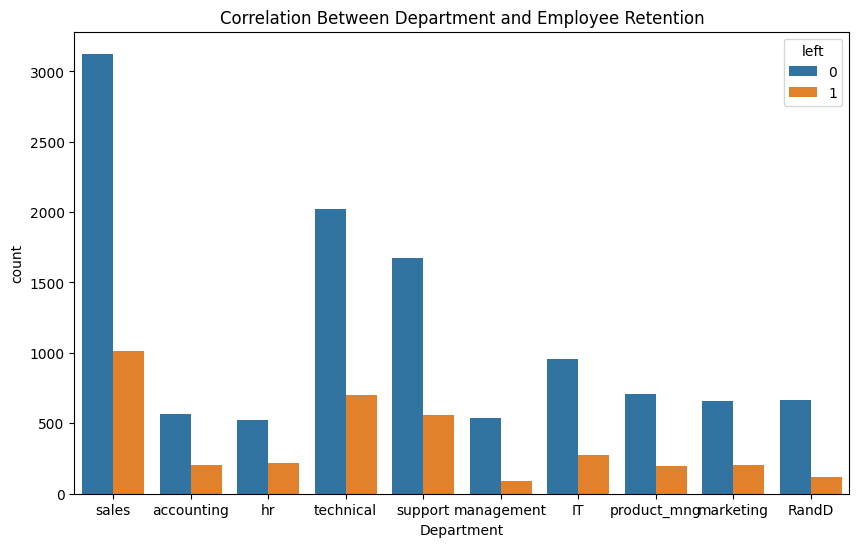

In [9]:
# Assuming the column name is 'Department' or something similar
plt.figure(figsize=(10,6))
sns.countplot(x='Department', hue='left', data=df)  # Update 'department' to the correct column name
plt.title('Correlation Between Department and Employee Retention')
plt.show()

In [8]:
df.columns = df.columns.str.strip()  # This removes any leading/trailing whitespace


#Building the Logistic Regression Model:
Now that we've explored the data, let’s focus on building the logistic regression model based on the variables identified in the EDA.

3.1. Preprocessing:
Convert categorical variables (salary, Department) to numerical using one-hot encoding.
Split the dataset into features (X) and target variable (y).

In [11]:
# One-hot encoding for categorical variables
df_dummies = pd.get_dummies(df, columns=['salary', 'Department'], drop_first=True)

# Features (X) and target (y)
X = df_dummies.drop('left', axis=1)
y = df_dummies['left']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)


Model Accuracy: 78.51%
Confusion Matrix:
 [[3174  254]
 [ 713  359]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      3428
           1       0.59      0.33      0.43      1072

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.76      0.79      0.76      4500

